# What techniques can be used to handle missing data

mean, meadian, mode to fillin 
zero or ones to fillin 
forward fillin
backword fillin
math fillin 
we can fillin

# 2. Import the necessary libraries and load the dataset 'volcano_data_2010_new.csv'

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
pd.options.display.max_columns=None
a = pd.read_csv('volcano_data_2010_new.csv')
a.head(20)

,Year,TSU,EQ,Name,Elevation,Type,Status,Time,VEI,Agent,DEATHS,DEATHS_DESCRIPTION,MISSING,MISSING_DESCRIPTION,INJURIES,INJURIES_DESCRIPTION,DAMAGE_MILLIONS_DOLLARS,DAMAGE_DESCRIPTION,HOUSES_DESTROYED,HOUSES_DESTROYED_DESCRIPTION,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,Latitude,Longitude,Country
0,Jan 2010,NaN,NaN,Tungurahua,5023,Stratovolcano,Historical,D1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.467,-78.442,Ecuador
1,Mar 2010,NaN,NaN,Eyjafjallajokull,1666,Stratovolcano,Historical,D1,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.630,-19.620,Iceland
2,May 2010,NaN,NaN,Pacaya,2552,Complex volcano,Historical,D1,1.0,T,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,1.0,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,1.0,14.381,-90.601,Guatemala
3,May 2010,TSU,EQ,Sarigan,538,Stratovolcano,Holocene,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.708,145.780,United States
4,Aug 2010,NaN,NaN,Karangetang [Api Siau],1784,Stratovolcano,Historical,D1,3.0,NaN,4.0,1.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,1.0,4.0,1.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,1.0,2.780,125.480,Indonesia
5,Aug 2010,NaN,NaN,Sinabung,2460,Stratovolcano,Holocene,U,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.170,98.392,Indonesia
6,Oct 2010,NaN,NaN,Merapi,2947,Stratovolcano,Historical,D1,NaN,NaN,367.0,3.0,NaN,NaN,277.0,3.0,600.0,4.0,NaN,3.0,367.0,3.0,NaN,NaN,277.0,3.0,600.0,4.0,NaN,3.0,-7.542,110.442,Indonesia
7,Nov 2010,NaN,NaN,Tungurahua,5023,Stratovolcano,Historical,D1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.467,-78.442,Ecuador
8,Dec 2010,NaN,NaN,Tengger Caldera,2329,Stratovolcano,Historical,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.942,112.950,Indonesia
9,Jan 2011,NaN,NaN,Merapi,2947,Stratovolcano,Historical,D1,NaN,M,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,-7.542,110.442,Indonesia


# 3. Find the top 3 countries which were worst affected by Volcanos based on the average damage in Dollars

In [70]:
a.TOTAL_DAMAGE_MILLIONS_DOLLARS.value_counts()

3.72      1
100.00    1
14.50     1
600.00    1
Name: TOTAL_DAMAGE_MILLIONS_DOLLARS, dtype: int64

In [71]:
a.TOTAL_DAMAGE_MILLIONS_DOLLARS.dropna().sort_values(ascending=False).head(3)

6     600.0
43    100.0
33     14.5
Name: TOTAL_DAMAGE_MILLIONS_DOLLARS, dtype: float64

In [72]:
a.Country[[6,43,33]]

6         Indonesia
43        Indonesia
33    United States
Name: Country, dtype: object

In [140]:
df1=pd.DataFrame(a.groupby('Country').agg('mean')['DAMAGE_MILLIONS_DOLLARS'])
df1

,DAMAGE_MILLIONS_DOLLARS
Country,
Cape Verde,0.000000
Chile,0.000000
Ecuador,0.000000
Eritrea,0.000000
Guatemala,0.000000
Iceland,0.000000
Indonesia,26.923077
Italy,0.000000
Japan,0.000000


# 4  Find the countries in which there were more number of missing people due to volcano and also mention the type of the volcano which caused it.

In [73]:
a[a.TOTAL_MISSING == a.TOTAL_MISSING.max()]

,Year,TSU,EQ,Name,Elevation,Type,Status,Time,VEI,Agent,DEATHS,DEATHS_DESCRIPTION,MISSING,MISSING_DESCRIPTION,INJURIES,INJURIES_DESCRIPTION,DAMAGE_MILLIONS_DOLLARS,DAMAGE_DESCRIPTION,HOUSES_DESTROYED,HOUSES_DESTROYED_DESCRIPTION,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,Latitude,Longitude,Country
45,Sep 2016,NaN,NaN,Rinjani,3726,Stratovolcano,Historical,D1,NaN,NaN,NaN,NaN,44.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-8.42,116.47,Indonesia


# Calculate the missing percentage of null values present in the dataset 

In [74]:
a.isnull().sum()*100/a.shape[0]

Year                                   0.000000
TSU                                   96.825397
EQ                                    98.412698
Name                                   0.000000
Elevation                              0.000000
Type                                   0.000000
Status                                 0.000000
Time                                   0.000000
VEI                                   69.841270
Agent                                 63.492063
DEATHS                                53.968254
DEATHS_DESCRIPTION                    53.968254
MISSING                               96.825397
MISSING_DESCRIPTION                   96.825397
INJURIES                              71.428571
INJURIES_DESCRIPTION                  66.666667
DAMAGE_MILLIONS_DOLLARS               93.650794
DAMAGE_DESCRIPTION                    34.920635
HOUSES_DESTROYED                      88.888889
HOUSES_DESTROYED_DESCRIPTION          74.603175
TOTAL_DEATHS                          53

#  Fill the below variables with 0 
'DEATHS','MISSING','INJURIES','DAMAGE_MILLIONS_DOLLARS','HOUSES_DESTROYED','TOTAL_DEAT
HS','TOTAL_MISSING','TOTAL_INJURIES','TOTAL_DAMAGE_MILLIONS_DOLLARS','TOTAL_HOUSES_D
ESTROYED'


In [78]:
a.DEATHS.fillna(value=0,inplace=True)
a.MISSING.fillna(value=0,inplace=True)
a.INJURIES.fillna(value=0,inplace=True)
a.DAMAGE_MILLIONS_DOLLARS.fillna(value=0,inplace=True)
a.HOUSES_DESTROYED.fillna(value=0,inplace=True)
a.TOTAL_DEATHS.fillna(value=0,inplace=True)
a.TOTAL_MISSING.fillna(value=0,inplace=True)
a.TOTAL_INJURIES.fillna(value=0,inplace=True)
a.TOTAL_DAMAGE_MILLIONS_DOLLARS.fillna(value=0,inplace=True)
a.TOTAL_HOUSES_DESTROYED.fillna(value=0,inplace=True)

# After imputation, again check for the missing percentage of null values present in the dataset, provide the inference 

In [80]:
a.isnull().sum()*100/a.shape[0]

Year                                   0.000000
TSU                                   96.825397
EQ                                    98.412698
Name                                   0.000000
Elevation                              0.000000
Type                                   0.000000
Status                                 0.000000
Time                                   0.000000
VEI                                   69.841270
Agent                                 63.492063
DEATHS                                 0.000000
DEATHS_DESCRIPTION                    53.968254
MISSING                                0.000000
MISSING_DESCRIPTION                   96.825397
INJURIES                               0.000000
INJURIES_DESCRIPTION                  66.666667
DAMAGE_MILLIONS_DOLLARS                0.000000
DAMAGE_DESCRIPTION                    34.920635
HOUSES_DESTROYED                       0.000000
HOUSES_DESTROYED_DESCRIPTION          74.603175
TOTAL_DEATHS                           0

# Drop the columns which contain more than 50% of null values, name the new data frame as“data_new” 

In [93]:
 data_new = a.drop(['TSU','EQ','VEI','Agent','DEATHS_DESCRIPTION','MISSING_DESCRIPTION','INJURIES_DESCRIPTION','HOUSES_DESTROYED_DESCRIPTION',
               'TOTAL_DEATHS_DESCRIPTION','TOTAL_MISSING_DESCRIPTION','TOTAL_INJURIES_DESCRIPTION','TOTAL_HOUSES_DESTROYED_DESCRIPTION'],axis=1)

# Compare the 'Country' and 'Status' variable and provide inferences about the volcanic eruptions. 

In [94]:
pd.crosstab(index=data_new.Country,columns=data_new.Status,dropna=False,margins=True)

Status,Historical,Holocene,Tephrochronology,All
Country,,,,
Cape Verde,1,0,0,1
Chile,1,1,0,2
Ecuador,3,0,0,3
Eritrea,0,1,0,1
Guatemala,2,0,0,2
Iceland,2,0,0,2
Indonesia,17,9,0,26
Italy,2,0,0,2
Japan,5,0,0,5


### the country coloumn has 

# Display a barplot comparing the Type, country and total_injuries# 

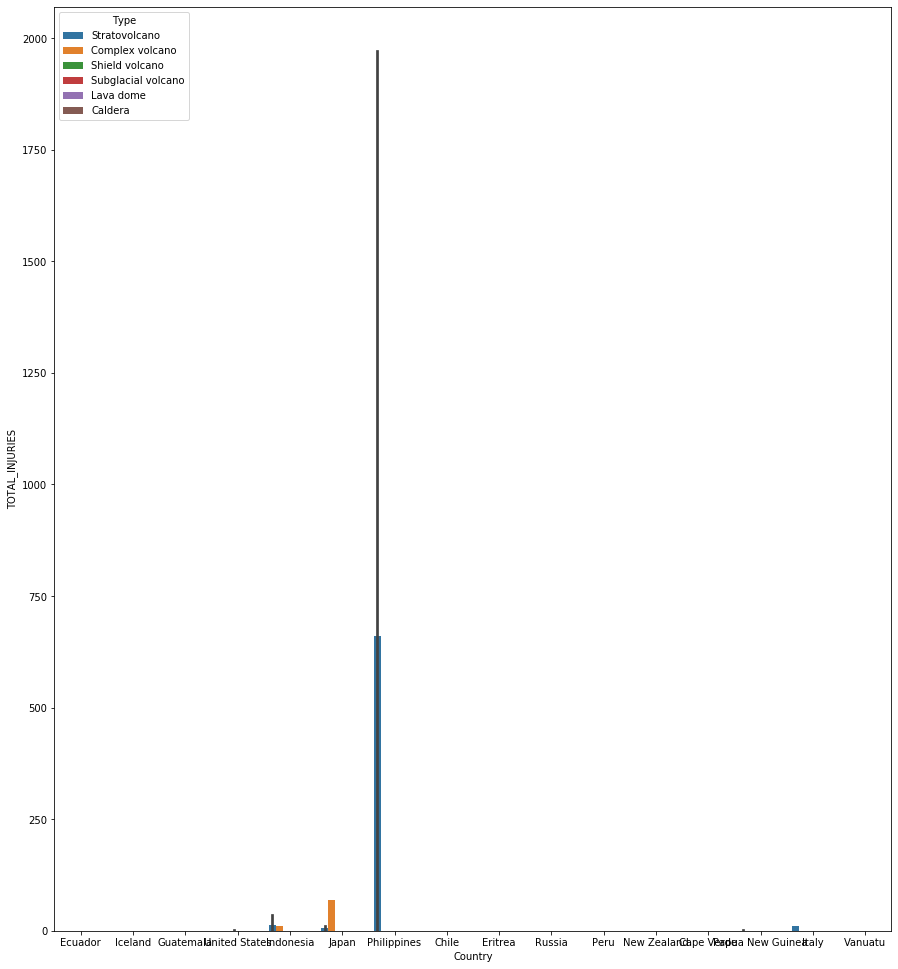

In [131]:
fig,ax = plt.subplots(1,figsize = (15,17))
sns.barplot(hue =data_new.Type,x = data_new.Country ,y = data_new.TOTAL_INJURIES)

In [108]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 21 columns):
Year                             63 non-null object
Name                             63 non-null object
Elevation                        63 non-null int64
Type                             63 non-null object
Status                           63 non-null object
Time                             63 non-null object
DEATHS                           63 non-null float64
MISSING                          63 non-null float64
INJURIES                         63 non-null float64
DAMAGE_MILLIONS_DOLLARS          63 non-null float64
DAMAGE_DESCRIPTION               41 non-null float64
HOUSES_DESTROYED                 63 non-null float64
TOTAL_DEATHS                     63 non-null float64
TOTAL_MISSING                    63 non-null float64
TOTAL_INJURIES                   63 non-null float64
TOTAL_DAMAGE_MILLIONS_DOLLARS    63 non-null float64
TOTAL_DAMAGE_DESCRIPTION         39 non-null float64
TOT

#  Plot the Seasonality for the Total_Deaths, state your observations 

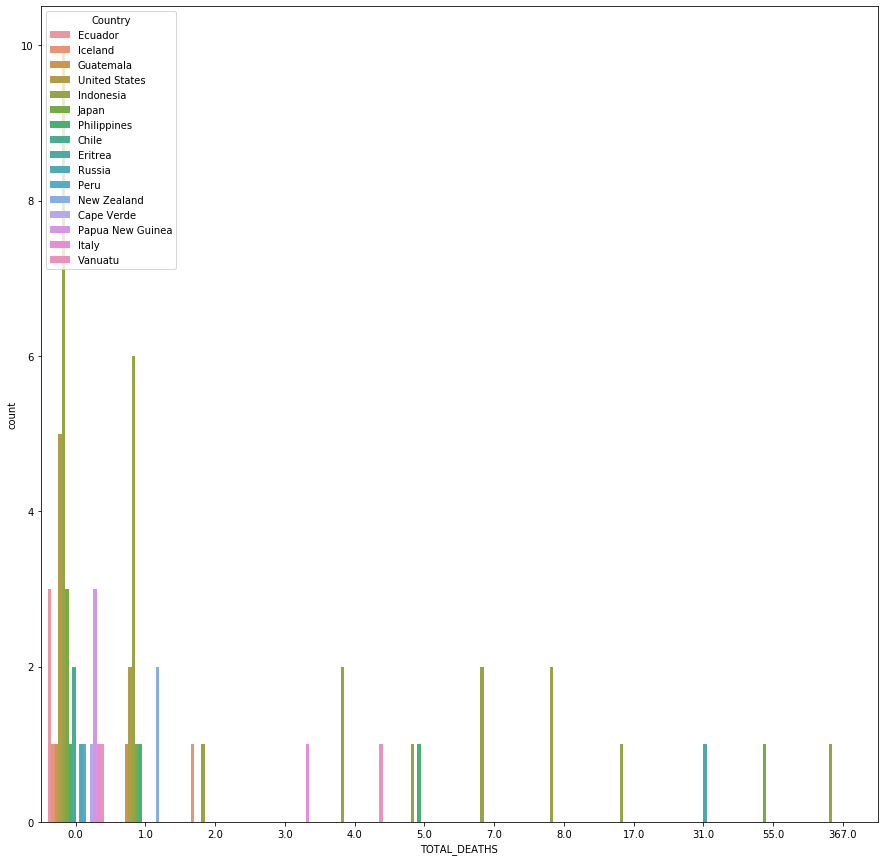

In [137]:
fig,ax = plt.subplots(1,figsize = (15,15))
sns.countplot(data_new.TOTAL_DEATHS,hue=data_new.Country)

#  Display pairplot for only the numerical variables, state your observations with respective to skewness

C:\Users\dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\dell\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


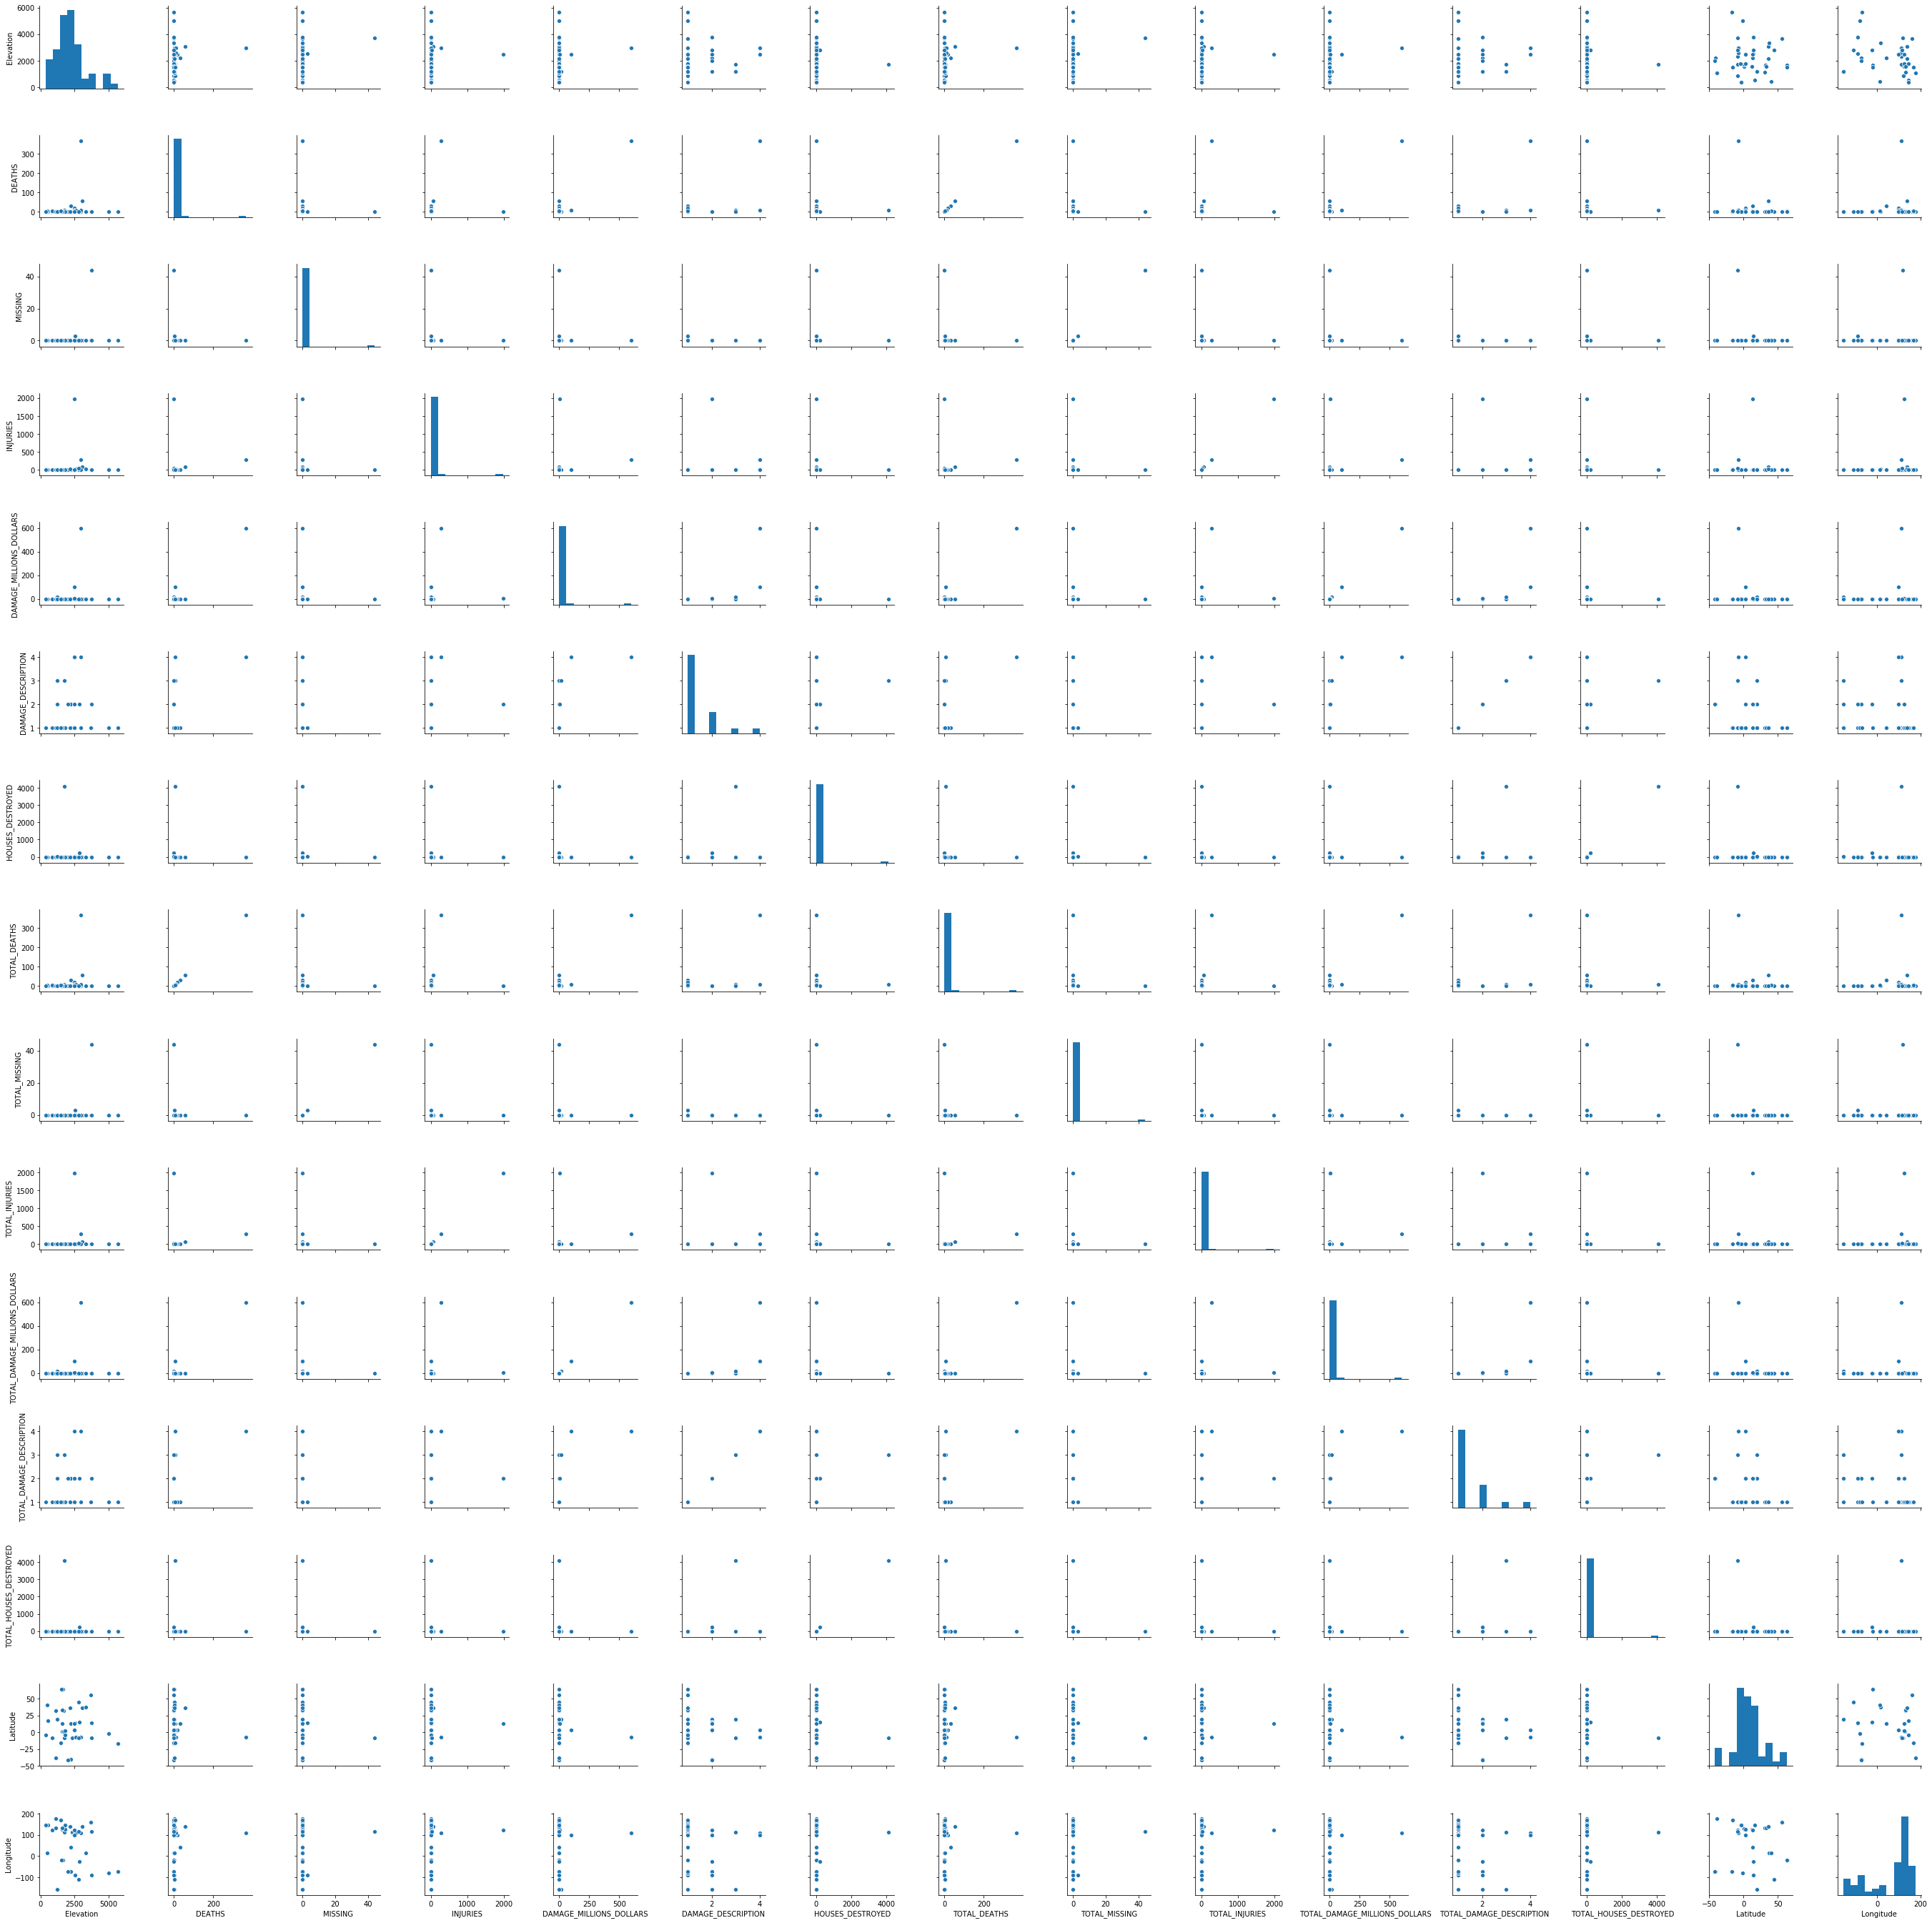

In [113]:
sns.pairplot(data_new.select_dtypes(exclude=object))

         Elevation 

skewness  :  0.9769616387932004 



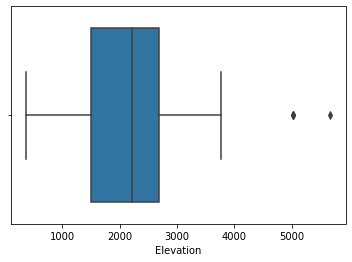

---------------------------------------------------------------------------------------------------------------
         DEATHS 

skewness  :  7.590126962713857 



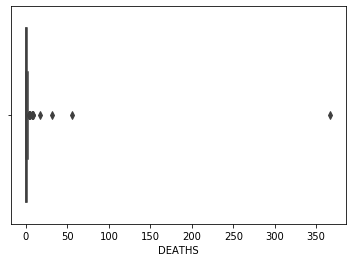

---------------------------------------------------------------------------------------------------------------
         MISSING 

skewness  :  7.882819007719456 



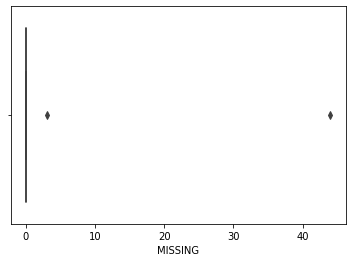

---------------------------------------------------------------------------------------------------------------
         INJURIES 

skewness  :  7.706738754294414 



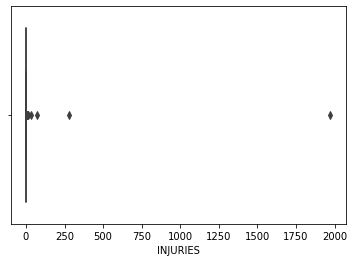

---------------------------------------------------------------------------------------------------------------
         DAMAGE_MILLIONS_DOLLARS 

skewness  :  7.6353849828711295 



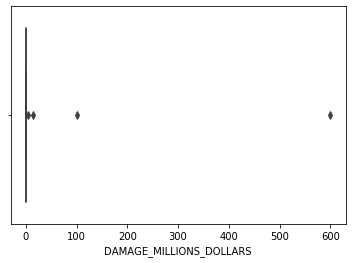

---------------------------------------------------------------------------------------------------------------
         DAMAGE_DESCRIPTION 

skewness  :  2.002737480411452 



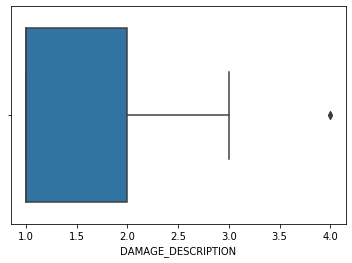

---------------------------------------------------------------------------------------------------------------
         HOUSES_DESTROYED 

skewness  :  7.900045718844662 



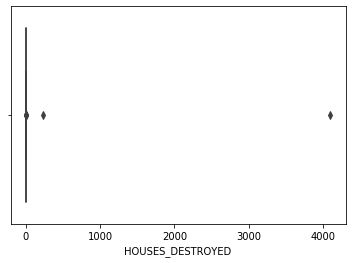

---------------------------------------------------------------------------------------------------------------
         TOTAL_DEATHS 

skewness  :  7.590126962713857 



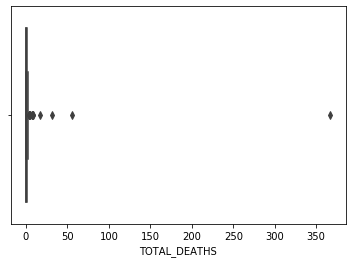

---------------------------------------------------------------------------------------------------------------
         TOTAL_MISSING 

skewness  :  7.882819007719456 



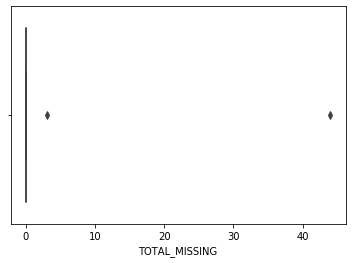

---------------------------------------------------------------------------------------------------------------
         TOTAL_INJURIES 

skewness  :  7.706738754294414 



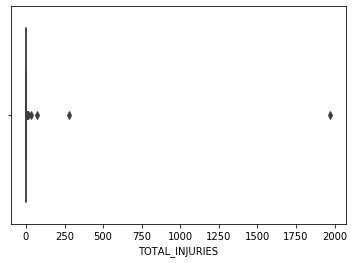

---------------------------------------------------------------------------------------------------------------
         TOTAL_DAMAGE_MILLIONS_DOLLARS 

skewness  :  7.6353849828711295 



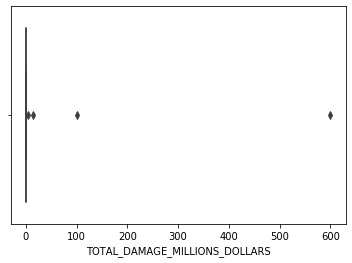

---------------------------------------------------------------------------------------------------------------
         TOTAL_DAMAGE_DESCRIPTION 

skewness  :  1.9255025555815855 



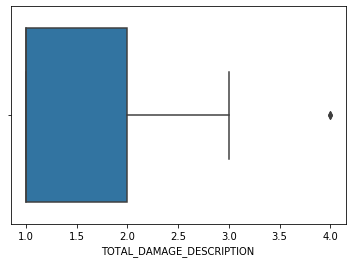

---------------------------------------------------------------------------------------------------------------
         TOTAL_HOUSES_DESTROYED 

skewness  :  7.9000327523115885 



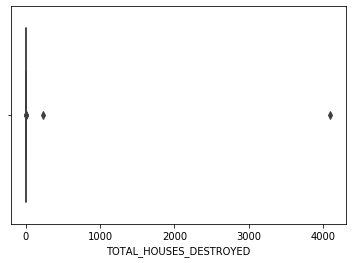

---------------------------------------------------------------------------------------------------------------
         Latitude 

skewness  :  0.3978476947217125 



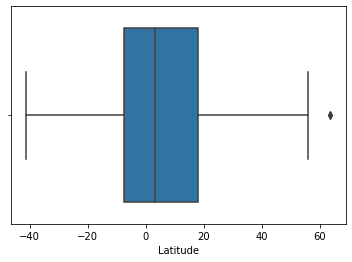

---------------------------------------------------------------------------------------------------------------
         Longitude 

skewness  :  -1.0249579340420703 



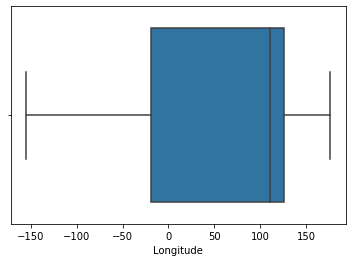

---------------------------------------------------------------------------------------------------------------


In [125]:
for i in data_new.select_dtypes(exclude=object):
    print('        ',i,'\n')
    print('skewness  : ',data_new[i].skew(),'\n')
    sns.boxplot(data_new[i])
    plt.show()
    print('---------------------------------------------------------------------------------------------------------------')